# CIEN 4012: Sustainable Urban Systems Engineering
# Lab 1

Welcome to the course of Sustainable Urban Systems Engineering! With lots of interdisciplinary input during the lectures, now it's time to get some exciting practice! In Lab 1, we will aggregate taxi flows into Hadsun Yards and investigate some potantial related variables. By going through this tutorial, you're get a flavor of some basic skills of urban analytics, such as spatial mapping, correlation analysis, and data analysis. 

This tutorial contains 3 modules:
- Aggregate taxi flows to Hudson Yards
- Map census population data to taxi zones
- Analyze the possible factors related to destination flows at Hadson Yards

## Aggregate taxi flows to Hudson Yards

In [1]:
# Import packages
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import geopandas as gpd

Read data

<Axes: >

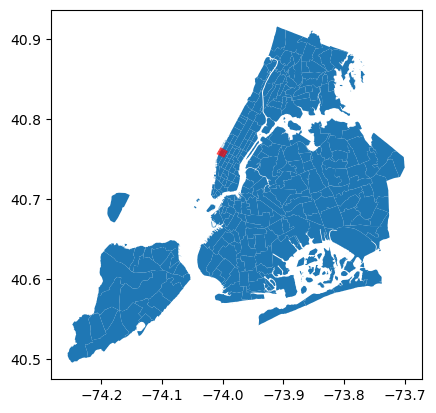

In [2]:
# shapefiles
taxi_zones = gpd.read_file('geo_export_e612eba5-03f4-49f0-a0ac-528f1c3802b8.shp')
taxi_zones.head()

attraction_zone = gpd.read_file('Hudson_Yards_Cut.shp')

fig, ax = plt.subplots()
taxi_zones.plot(ax=ax)
attraction_zone.plot(ax=ax, color='red', alpha=0.7)

Read taxi trip data

NYC has open datasets of taxi trips, which can be downloaded at: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [3]:
taxi_data = pd.read_parquet('yellow_tripdata_2023-11.parquet')
print('1-month taxi data count ', len(taxi_data))
taxi_data.head()


1-month taxi data count  3339715


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-11-01 00:03:03,2023-11-01 01:04:08,2.0,13.60,1.0,N,132,26,2,61.8,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75
1,1,2023-11-01 00:03:28,2023-11-01 00:23:59,0.0,3.50,1.0,N,140,7,1,20.5,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00
2,2,2023-10-31 23:58:05,2023-11-01 00:54:03,4.0,18.61,2.0,N,132,230,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
3,2,2023-11-01 00:03:50,2023-11-01 00:04:59,1.0,0.39,1.0,N,236,236,1,4.4,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00
4,2,2023-11-01 00:06:30,2023-11-01 00:14:25,1.0,1.20,1.0,N,236,141,1,10.0,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00


Extract unique zone IDs in the attraction zone

<Axes: >

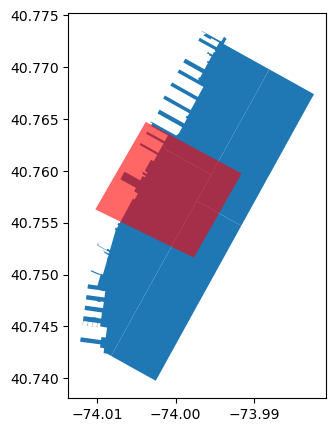

In [4]:
attr_taxi_zones = taxi_zones[taxi_zones.intersects(attraction_zone.loc[0,'geometry'])]

fig, ax = plt.subplots(figsize = (5,5))
attr_taxi_zones.plot(ax = ax)
attraction_zone.plot(ax=ax, color='red', alpha = 0.6)

In [5]:
attr_zones_ids = attr_taxi_zones['objectid'].unique().tolist()
print('taxi zone IDs within the attraction region: ', attr_zones_ids)

taxi zone IDs within the attraction region:  [48.0, 50.0, 68.0, 246.0]


Calculate distance to Hudson Yards

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# calculate the distance to Hudson Yards
taxi_centroids = taxi_zones.centroid
taxi_centroids = taxi_centroids.to_crs(26914)

att_centroid = attraction_zone.centroid
att_centroid = att_centroid.to_crs(26914)

taxi_zones['distance'] = np.NaN
for i in range(len(taxi_zones)):
    taxi_zones['distance'][i] = taxi_centroids[i].distance(att_centroid)

<Axes: >

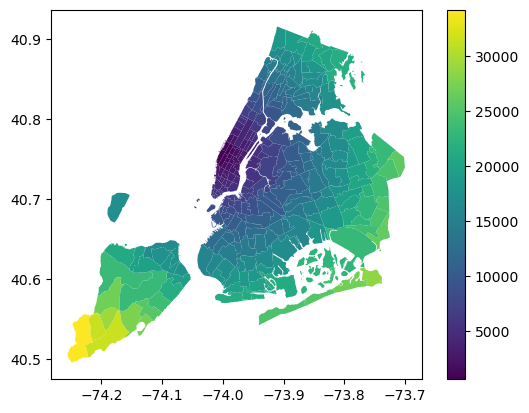

In [8]:
taxi_zones.plot('distance', legend=True)

Aggregate taxi trips dropped off at Hudson Yards

In [9]:
taxi_data = taxi_data[taxi_data['DOLocationID'].isin(attr_zones_ids)]
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
7,1,2023-11-01 00:07:29,2023-11-01 00:11:01,2.0,0.90,1.0,N,48,246,1,6.5,3.5,0.5,2.30,0.0,1.0,13.80,2.5,0.0
15,2,2023-11-01 00:07:30,2023-11-01 00:20:20,2.0,1.93,1.0,N,234,48,1,13.5,1.0,0.5,3.70,0.0,1.0,22.20,2.5,0.0
83,2,2023-11-01 00:36:59,2023-11-01 00:51:23,1.0,3.08,1.0,N,261,246,1,17.0,1.0,0.5,4.40,0.0,1.0,26.40,2.5,0.0
86,2,2023-11-01 00:22:02,2023-11-01 00:27:06,1.0,1.21,1.0,N,142,48,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.0
111,2,2023-11-01 00:42:00,2023-11-01 00:50:03,1.0,1.60,1.0,N,48,68,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0


In [10]:
trip_passenger_counts = pd.DataFrame(taxi_data.groupby('PULocationID').sum(['passenger_count'])).reset_index(drop=False)
trip_passenger_counts = trip_passenger_counts[['PULocationID', 'passenger_count']]
trip_passenger_counts.head()

,PULocationID,passenger_count
0,3,1.0
1,4,189.0
2,7,25.0
3,10,71.0
4,11,1.0


Assign taxi trips to the corresponding taxi zones

In [11]:
taxi_zones.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,distance
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",17274.381520
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",22444.730709
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",18499.389867
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4555.661235
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",29320.163670


In [12]:
taxi_zones = pd.merge(taxi_zones, trip_passenger_counts, left_on='objectid', right_on='PULocationID', how='left')
taxi_zones.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,distance,PULocationID,passenger_count
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",17274.381520,NaN,NaN
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",22444.730709,NaN,NaN
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",18499.389867,3.0,1.0
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4555.661235,4.0,189.0
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",29320.163670,NaN,NaN


<Axes: >

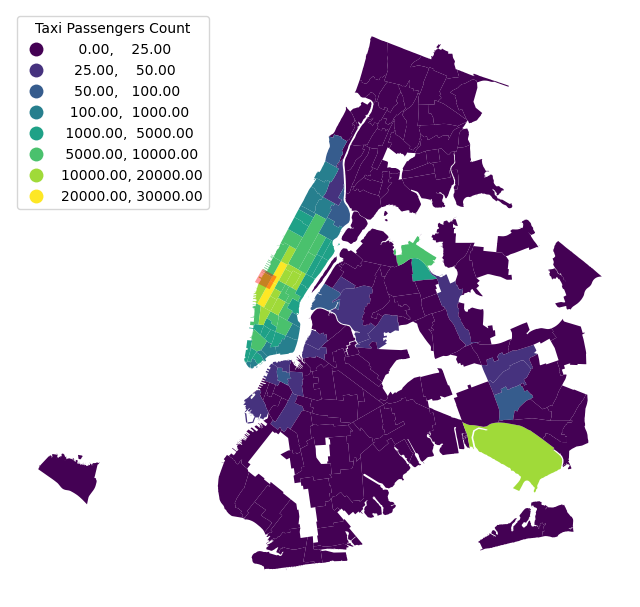

In [13]:
# %matplotlib qt
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')

taxi_zones.plot(column = 'passenger_count', ax = ax, legend=True, cmap='viridis',legend_kwds={'loc': 'upper left'},
        scheme = 'User_Defined', #quantiles
        classification_kwds =dict(bins=[ 25,50,100, 1000,5000, 10000, 20000, 30000])) #[4, 8, 50, 100, 200, merged['cnt'].max()]
ax.get_legend().set_title("Taxi Passengers Count")
attraction_zone.plot(ax=ax, color='red', alpha = 0.4)

## Map census population to taxi zones

Read CBG (census block group) shapefile and clip it within NYC boroughs

<Axes: >

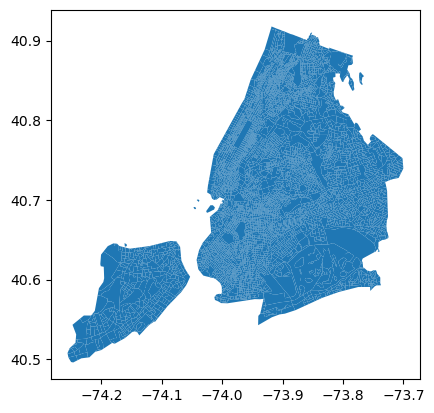

In [14]:
cbgs = gpd.read_file('cb_2021_36_bg_500k.shp')

COUNTYFP = ['081','061','005','047','085']  # NYC 5 borough codes
cbgs_nyc = cbgs[cbgs['COUNTYFP'].isin(COUNTYFP)].reset_index(drop=True)

cbgs_nyc.plot()

Read census population

In [15]:
population = pd.read_csv('CenPop2020_Mean_BG36.txt')

Assign population to CBGs

In [16]:
cbgs_nyc = cbgs_nyc.astype({'STATEFP':'int', 'COUNTYFP': 'int', 'TRACTCE': 'int', 'BLKGRPCE': 'int'})
cbgs_nyc = cbgs_nyc.merge(population, how='left', on=['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE'])

<Axes: >

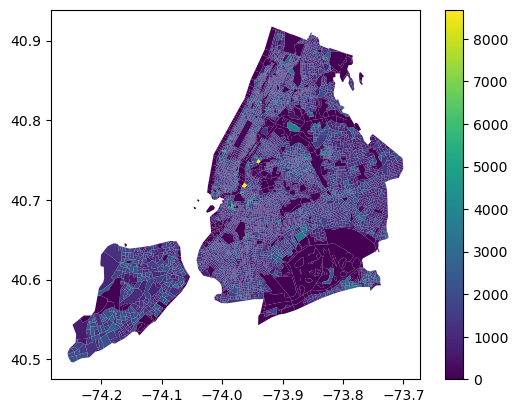

In [17]:
cbgs_nyc.plot(column='POPULATION', legend=True, cmap='viridis')

Map CBGs to taxi zones

The mapping function can be found in the GitHub page: https://github.com/sev-90/art_of_engineering_course

In [18]:
from grid_mapper import map_to_taxiZones

cbgs_nyc = map_to_taxiZones(cbgs_nyc, taxi_zones)
cbgs_nyc.head(3)

6758
0
1000
2000
3000
4000
5000
6000


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,POPULATION,LATITUDE,LONGITUDE,taxi_object_id,taxi_geometry
0,36,81,93401,2,1500000US360810934012,360810934012,2,Block Group 2,BG,132716,0,"POLYGON ((-73.84400 40.57951, -73.84305 40.577...",1195,40.576905,-73.843890,201.0,"POLYGON ((-73.81849901800001 40.5873623529999,..."
1,36,61,13502,0,1500000US360610135020,360610135020,0,Block Group 0,BG,0,248165,"POLYGON ((-74.00162 40.77455, -74.00045 40.776...",0,40.773010,-73.998758,None,None
2,36,5,51601,2,1500000US360050516012,360050516012,2,Block Group 2,BG,256313,0,"POLYGON ((-73.79188 40.85522, -73.78743 40.849...",993,40.847046,-73.788423,46.0,MULTIPOLYGON (((-73.78452431937963 40.86047706...


Filter out CBGs not included in taxi zones

In [19]:
cbgs_nyc.dropna(inplace=True, ignore_index=True)
cbgs_nyc.head(3)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,POPULATION,LATITUDE,LONGITUDE,taxi_object_id,taxi_geometry
0,36,81,93401,2,1500000US360810934012,360810934012,2,Block Group 2,BG,132716,0,"POLYGON ((-73.84400 40.57951, -73.84305 40.577...",1195,40.576905,-73.843890,201.0,"POLYGON ((-73.81849901800001 40.5873623529999,..."
1,36,5,51601,2,1500000US360050516012,360050516012,2,Block Group 2,BG,256313,0,"POLYGON ((-73.79188 40.85522, -73.78743 40.849...",993,40.847046,-73.788423,46.0,MULTIPOLYGON (((-73.78452431937963 40.86047706...
2,36,61,15001,1,1500000US360610150011,360610150011,1,Block Group 1,BG,25990,0,"POLYGON ((-73.95881 40.78086, -73.95720 40.780...",1128,40.779984,-73.958397,236.0,POLYGON ((-73.95779380499984 40.77359989699994...


Aggregate census population to taxi zones

In [20]:
aggregated = pd.DataFrame(cbgs_nyc[['POPULATION', 'taxi_object_id']].groupby('taxi_object_id').sum()['POPULATION']).reset_index(drop=False)
aggregated = pd.merge(taxi_zones, aggregated, left_on='objectid', right_on='taxi_object_id', how='right' )
aggregated.dropna(inplace=True)
aggregated.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,distance,PULocationID,passenger_count,taxi_object_id,POPULATION
1,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",18499.389867,3.0,1.0,3.0,31134
2,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4555.661235,4.0,189.0,4.0,26898
5,Queens,7.0,7.0,0.000390,0.107417,Astoria,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",7245.745596,7.0,25.0,7.0,80244
8,Queens,10.0,10.0,0.000436,0.099839,Baisley Park,"POLYGON ((-73.78327 40.68999, -73.78234 40.688...",20898.211628,10.0,71.0,10.0,39388
9,Brooklyn,11.0,11.0,0.000265,0.079211,Bath Beach,"POLYGON ((-74.00110 40.60303, -74.00032 40.602...",18039.922406,11.0,1.0,11.0,33070


## Analyze potential factors related to destination flows at Hudson Yards

Here we analyze two factors: residential population and distance. 

Drawing scatter plots are a good way to observe the possible relations between variables.

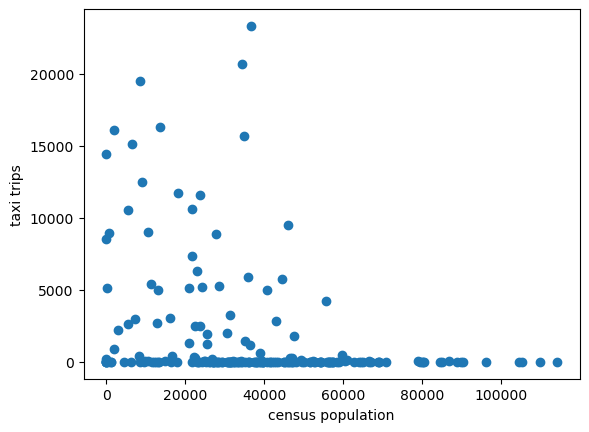

In [21]:
fig, ax = plt.subplots()
ax.scatter(aggregated['POPULATION'], aggregated['passenger_count'])
ax.set_xlabel('census population')
ax.set_ylabel('taxi trips')
plt.show()

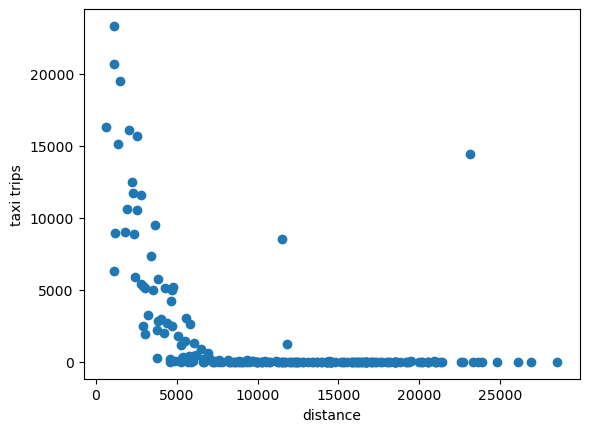

In [22]:
fig, ax = plt.subplots()
ax.scatter(aggregated['distance'], aggregated['passenger_count'])
ax.set_xlabel('distance')
ax.set_ylabel('taxi trips')
plt.show()

From two scatter plots above, we can see that census population don't have clear correlation with number of taxi trips to Hudson Yards. In contrast, with increasing distance, the number of trips to Hudson Yards decreases. Besides, beyond a certain distance, there are hardly taxi trips. This finding can be observed from the 3D scatter plot below as well. 

How to relate this finding to our life?

A possible explanation is: when destination is too far away from home location, people may take public transportation to avoid high taxi fares.

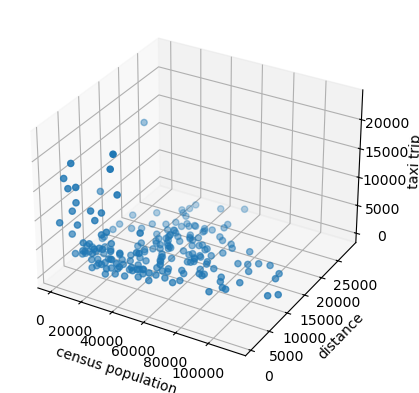

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aggregated['POPULATION'], aggregated['distance'], aggregated['passenger_count']) # the original data
ax.set_xlabel('census population')
ax.set_ylabel('distance')
ax.set_zlabel('taxi trip')
plt.show()